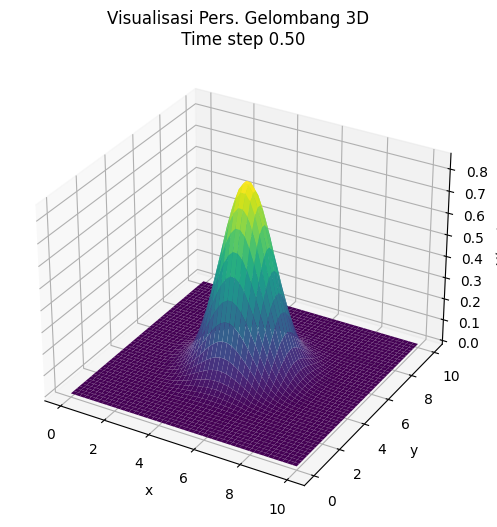

Visualisasi selesai.


In [1]:
#pola stripes (a)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter simulasi
Lx, Ly, Lz = 10.0, 10.0, 10.0   # Dimensi ruang
Nx, Ny, Nz = 50, 50, 50         # Jumlah titik grid
dx, dy, dz = Lx/Nx, Ly/Ny, Lz/Nz # Jarak antar titik grid
dt = 0.005                      # Langkah waktu
target_time = 0.5               # Waktu target untuk visualisasi
Nt = int(target_time / dt)      # Jumlah langkah waktu

# Grid 3D
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Definisikan kecepatan gelombang dengan pola vertical stripes
A, B = 0.1, 0.6
c = np.full((Nx, Ny, Nz), A)
third_x = Nx // 3
c[third_x:2*third_x, :, :] = B

# Kondisi awal gelombang Gaussian
sigma = 1.0
u = np.exp(-((X-Lx/2)**2 + (Y-Ly/2)**2 + (Z-Lz/2)**2) / (2*sigma**2))
u_prev = np.copy(u)

# Simulasi FDM
u_next = np.zeros((Nx, Ny, Nz))
for n in range(1, Nt+1):
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            for k in range(1, Nz-1):
                u_next[i, j, k] = (2*u[i, j, k] - u_prev[i, j, k] +
                                  (c[i, j, k]*dt/dx)**2 * (u[i+1, j, k] - 2*u[i, j, k] + u[i-1, j, k]) +
                                  (c[i, j, k]*dt/dy)**2 * (u[i, j+1, k] - 2*u[i, j, k] + u[i, j-1, k]) +
                                  (c[i, j, k]*dt/dz)**2 * (u[i, j, k+1] - 2*u[i, j, k] + u[i, j, k-1]))

    # Update untuk langkah berikutnya
    u_prev = np.copy(u)
    u = np.copy(u_next)

# Visualisasi pada waktu target
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
slice_index = Nz // 2 
ax.plot_surface(X[:, :, slice_index], Y[:, :, slice_index], u[:, :, slice_index], cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U(x,y)')
ax.set_title(f'Visualisasi Pers. Gelombang 3D \n Time step {target_time:.2f}')
plt.show()

print("Visualisasi selesai.")


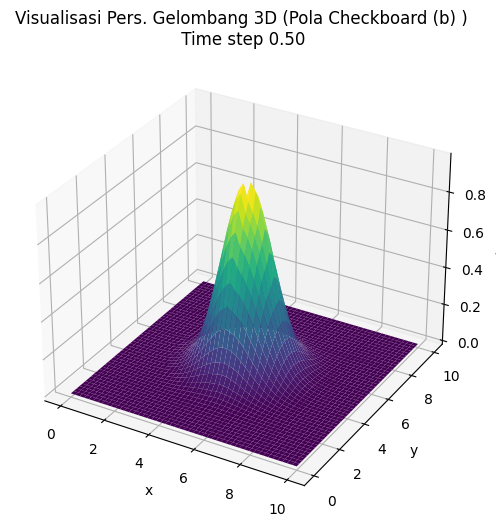

Visualisasi selesai.


In [2]:
#Checkerboard (b)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter simulasi
Lx, Ly, Lz = 10.0, 10.0, 10.0   # Dimensi ruang
Nx, Ny, Nz = 50, 50, 50         # Jumlah titik grid
dx, dy, dz = Lx/Nx, Ly/Ny, Lz/Nz # Jarak antar titik grid
dt = 0.005                      # Langkah waktu
target_time = 0.5               # Waktu target untuk visualisasi
Nt = int(target_time / dt)      # Jumlah langkah waktu

# Grid 3D
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Definisikan kecepatan gelombang dengan pola checkerboard
A, B = 0.1, 0.6
c = np.full((Nx, Ny, Nz), A)
half_x = Nx // 2
half_y = Ny // 2
c[:half_x, half_y:, :] = B
c[half_x:, :half_y, :] = B

# Kondisi awal gelombang Gaussian
sigma = 1.0
u = np.exp(-((X-Lx/2)**2 + (Y-Ly/2)**2 + (Z-Lz/2)**2) / (2*sigma**2))
u_prev = np.copy(u)

# Simulasi FDM
u_next = np.zeros((Nx, Ny, Nz))
for n in range(1, Nt+1):
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            for k in range(1, Nz-1):
                u_next[i, j, k] = (2*u[i, j, k] - u_prev[i, j, k] +
                                  (c[i, j, k]*dt/dx)**2 * (u[i+1, j, k] - 2*u[i, j, k] + u[i-1, j, k]) +
                                  (c[i, j, k]*dt/dy)**2 * (u[i, j+1, k] - 2*u[i, j, k] + u[i, j-1, k]) +
                                  (c[i, j, k]*dt/dz)**2 * (u[i, j, k+1] - 2*u[i, j, k] + u[i, j, k-1]))

    # Update untuk langkah berikutnya
    u_prev = np.copy(u)
    u = np.copy(u_next)

# Visualisasi pada waktu target
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
slice_index = Nz // 2  # Memilih irisan tengah pada bidang z
ax.plot_surface(X[:, :, slice_index], Y[:, :, slice_index], u[:, :, slice_index], cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U(x,y)')
ax.set_title(f'Visualisasi Pers. Gelombang 3D (Pola Checkboard (b) )\n Time step {target_time:.2f}')
plt.show()

print("Visualisasi selesai.")



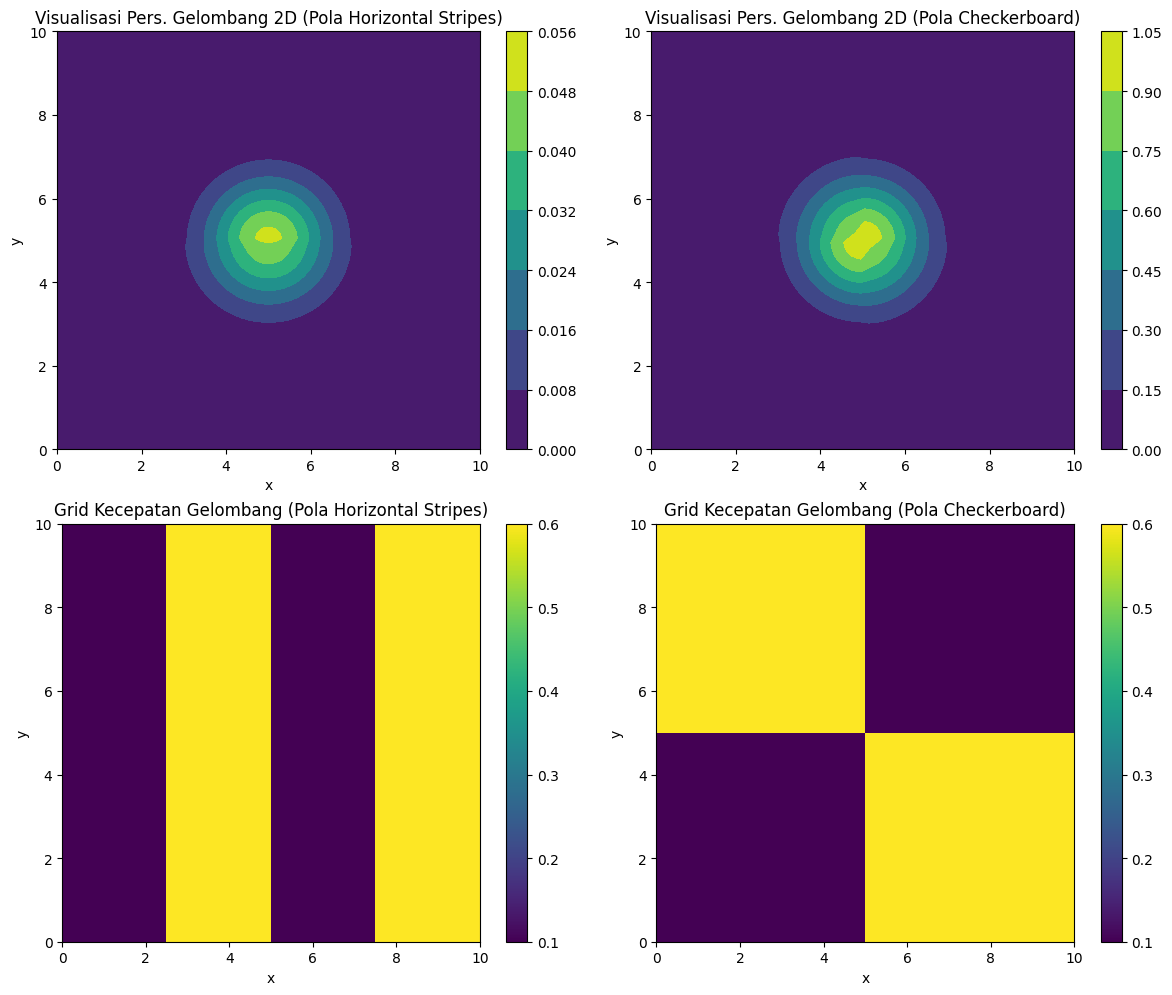

Visualisasi selesai untuk kedua pola.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter simulasi
Lx, Ly = 10.0, 10.0   # Dimensi ruang 2D
Nx, Ny = 100, 100     # Jumlah titik grid
dx, dy = Lx/Nx, Ly/Ny # Jarak antar titik grid
dt = 0.005            # Langkah waktu
target_time = 0.5     # Waktu target untuk visualisasi
Nt = int(target_time / dt)  # Jumlah langkah waktu

# Grid 2D
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Definisikan kecepatan gelombang dengan pola horizontal stripes
A, B = 0.1, 0.6
c_horizontal = np.full((Nx, Ny), A)
quarter_y = Ny // 4
c_horizontal[:, quarter_y:2*quarter_y] = B
c_horizontal[:, 2*quarter_y:3*quarter_y] = A
c_horizontal[:, 3*quarter_y:] = B

# Definisikan kecepatan gelombang dengan pola checkerboard 4 domain
c_checkerboard = np.full((Nx, Ny), A)
half_x = Nx // 2
half_y = Ny // 2
c_checkerboard[half_x:, :half_y] = B
c_checkerboard[:half_x, half_y:] = B
c_checkerboard[:half_x, :half_y] = A
c_checkerboard[half_x:, half_y:] = A

# Kondisi awal gelombang Gaussian
sigma = 1.0
x0, y0 = Lx / 2, Ly / 2
u =(1/(2*((np.pi)**2))) * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))
u_prev = np.copy(u)

# Simulasi FDM untuk pola horizontal stripes
u_next = np.zeros((Nx, Ny))
for n in range(1, Nt + 1):
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u_next[i, j] = (2 * u[i, j] - u_prev[i, j] +
                            (c_horizontal[i, j] * dt / dx)**2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                            (c_horizontal[i, j] * dt / dy)**2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    # Update untuk langkah berikutnya
    u_prev = np.copy(u)
    u = np.copy(u_next)

u_horizontal = np.copy(u)

# Simulasi FDM untuk pola checkerboard
u = np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))
u_prev = np.copy(u)
u_next = np.zeros((Nx, Ny))
for n in range(1, Nt + 1):
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u_next[i, j] = (2 * u[i, j] - u_prev[i, j] +
                            (c_checkerboard[i, j] * dt / dx)**2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                            (c_checkerboard[i, j] * dt / dy)**2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    # Update untuk langkah berikutnya
    u_prev = np.copy(u)
    u = np.copy(u_next)

u_checkerboard = np.copy(u)

# Visualisasi
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Pola horizontal stripes
axs[0, 0].contourf(X, Y, u_horizontal, cmap='viridis')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].set_title('Visualisasi Pers. Gelombang 2D (Pola Horizontal Stripes)')
fig.colorbar(axs[0, 0].contourf(X, Y, u_horizontal, cmap='viridis'), ax=axs[0, 0])

# Pola checkerboard
axs[0, 1].contourf(X, Y, u_checkerboard, cmap='viridis')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
axs[0, 1].set_title('Visualisasi Pers. Gelombang 2D (Pola Checkerboard)')
fig.colorbar(axs[0, 1].contourf(X, Y, u_checkerboard, cmap='viridis'), ax=axs[0, 1])

# Visualisasi grid horizontal stripes
axs[1, 0].imshow(c_horizontal, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
axs[1, 0].set_title('Grid Kecepatan Gelombang (Pola Horizontal Stripes)')
fig.colorbar(axs[1, 0].imshow(c_horizontal, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis'), ax=axs[1, 0])

# Visualisasi grid checkerboard
axs[1, 1].imshow(c_checkerboard, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
axs[1, 1].set_title('Grid Kecepatan Gelombang (Pola Checkerboard)')
fig.colorbar(axs[1, 1].imshow(c_checkerboard, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis'), ax=axs[1, 1])

plt.tight_layout()
plt.show()

print("Visualisasi selesai untuk kedua pola.")
